In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Ridolfi_Dataset

In [3]:
rid_df=pd.read_excel('Ridolfi_Calibration_Dataset.xlsx', sheet_name='Sheet1')

In [4]:
rid_df['Reference'].unique()

array(['Adam & Green (1994)', 'Gardner et al. (1995)',
       'Moore & Carmichael (1998)', 'Martel et al. (1999)',
       'Scailet & Evans (1999)', 'Dalpè & Baker (2000)',
       'Kaszuba & Wendlandt (2000)', 'Phichavant et al. (2002)',
       'Rutherford & Devine (2003)', 'Costa et al. (2004)',
       'Nekvasil (2004)', 'Sato et al. (2005)', 'Caricchi et al. (2006)',
       'Adam et al. (2007)', 'Mc Canta et al. (2007)',
       'Irving & Green (2008)', 'Rutherford & Devine (2008)',
       'Mercer & Johnston (2008)', 'Freise et al. (2009)',
       'Pietranik et al. (2009)', 'Pilet et al. (2010)',
       'Krawczynski et al. (2012)', 'Blatter et al. (2013)',
       'Almeev et al. (2013)', 'Andujar et al. (2015)',
       'Riker et al. (2015)', 'Iacovino et al. (2016)',
       'Ulmer et al. (2018)'], dtype=object)

In [5]:
# No aam and green in my dataset
# No gardner
# Moore yes
# Martel yes
# Scailet No
# Dalpe No
# Kaszuba no
# Pichavent yes
# RD No
# Costa 2004 yes
# Neksavil No
# Sato No
# Carrichi No
# Adam No
# McCanta 2007 no
# Irving No
# RD2008 no
# Mercer yes
# Freise No
# Pietranik
# Pilet 
# Kraw yes
# Blatter yes
# Almeev yes 
# Andu yes
# Riker  eys
#IAcovino  no
# ulmer yes

In [6]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Amp-Liq')
myAmps1=out['Amps']
myLiquids1=out['Liqs']
Amp_Glass=out['my_input']

## Checking they are amphiboles

In [7]:
Class=pt.classify_phases(df=myAmps1, str_to_drop="_Amp")
Class['Phase_Min_Group_ML'].unique()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refe

array(['Amp'], dtype=object)

In [8]:
InRidolfi=(
(Amp_Glass['Citation_x'].str.startswith('Moore, G., and Carmichael, I.S.E. (1998)'))
)
sum(InRidolfi)


10

In [9]:

Mgno_hyd=pt.calculate_amp_liq_mgno_hyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)
Mgno_anhyd=pt.calculate_amp_liq_mgno_anhyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)

notinLEPR= Amp_Glass['Citation_x'].str.startswith('notinLEPR')
notinKeith=(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008)'))|(Amp_Glass['Citation_x'].str.startswith('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InRidolfi=(
(Amp_Glass['Citation_x'].str.startswith('Moore, G., and Carmichael, I.S.E. (1998) The hydrous phase equilibria (to 3 kbar) of an andesite and basaltic andesite from western Mexico: constraints on water content and conditions of phenocryst growth. Contributions to Mineralogy and Petrology 130 304-319. 10.1007/s004100050367'))
|
(Amp_Glass['Citation_x'].str.startswith('Martel, C., Pichavant, M., Holtz, F., Scaillet, B., Bourdier, J., Traineau, H. (1999) Effects of fO2 and H2O on andesite phase relations between 2 and 4 kbar. Journal of Geophysical Research'))
|
(Amp_Glass['Citation_x'].str.startswith('Pichavant, M., Martel, C., Bourdier, J.-L., Scaillet, B. (2002) Physical conditions, structure, and dynamics of a zoned magma chamber: Mount Pelée (Martinique, Lesser Antilles Arc). Journal'))
|
(Amp_Glass['Citation_x'].str.startswith('Costa2004_notinLEPR')) 
|
(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008) Experimental studies of the P-T-H2O near-liquidus phase relations of basaltic andesite from North Sister Volcano, High Oregon Cascades:')) 
|
(Amp_Glass['Citation_x'].str.startswith('Kraw2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Blatter2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Almeev2013_notinLEPR')) 
  |
 (Amp_Glass['Citation_x'].str.startswith('Andujar2015_notinLEPR')) 
   |
 (Amp_Glass['Citation_x'].str.startswith('Riker2015_notinLEPR'))
    |
 (Amp_Glass['Citation_x'].str.startswith('Ulmer2018_notinLEPR')) 
)

    
    

newMask=~InRidolfi
newMask=newMask.fillna(False)
Eq_mask=abs(0.28-Mgno_anhyd)<0.11
mask_1GPa=Amp_Glass['P_kbar_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Amp_Glass_Filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
myAmps_filt=myAmps1.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
Amp_Glass_filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)

In [10]:
Amp_Glass_filt['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Carmichael, I.S.E. (2004) A hornblende basalt from western Mexico: water-saturated phase relations constrain a pressure-temperature window of eruptibility. Journal of Petrology 45 485-506. 10.1093/petrology/egg091',
       'Barclay, J., Rutherford, M.J., Carroll, M.R

## Amphibole-only temperatures using Ridolfi (2012)

In [11]:
len(Amp_Glass_filt)

175

In [12]:
Press_Ridolfi12=pt.calculate_amp_only_press_temp(amp_comps=myAmps_filt, equationT="T_Ridolfi2012", equationP="P_Ridolfi2021")
Press_Ridolfi12_Filt=Press_Ridolfi12.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
Amp_Glass_filt2=Amp_Glass_filt.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
Amp_filt2=myAmps_filt.loc[Press_Ridolfi12['Input_Check']==True].reset_index(drop=True)
highNa=Press_Ridolfi12.loc[Press_Ridolfi12['Na2O_Amp']>2]
highNa.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
2,10.638413,1238.489363,True,,Tschermakitic pargasite,1a,41.000000,1.51,15.1,13.800000,0.36,11.6,10.8,2.13,0.78,0.0,0.0,0.0,2
3,5.571807,1168.823305,True,,Tschermakitic pargasite,1c,40.700001,1.65,15.0,16.500000,0.25,10.1,10.5,2.08,0.70,0.0,0.0,0.0,3
4,9.155872,1196.205134,True,,Mg-hastingsite,1d,40.500000,1.31,15.2,16.799999,0.35,9.4,10.9,2.22,0.82,0.0,0.0,0.0,4
5,6.666863,1272.244971,True,,Tschermakitic pargasite,1a,42.500000,2.92,12.5,12.500000,0.40,13.2,10.5,2.24,0.51,0.0,0.0,0.0,5
9,5.372721,1191.593061,True,,Tschermakitic pargasite,1c,41.400002,1.97,14.1,16.900000,0.41,10.1,10.0,2.09,0.57,0.0,0.0,0.0,9


In [13]:
Press_Ridolfi12.loc[Press_Ridolfi12['Input_Check']]
                    

,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,6.579204,1180.771030,True,,Tschermakitic pargasite,1c,40.000000,1.85,16.00,15.500000,0.37,9.48,10.60,1.90,0.82,0.0,0.0,0.0,0
1,4.965809,1149.929754,True,,Tschermakitic pargasite,1c,41.400002,1.67,13.60,18.100000,0.49,8.48,10.40,1.73,0.69,0.0,0.0,0.0,1
2,10.638413,1238.489363,True,,Tschermakitic pargasite,1a,41.000000,1.51,15.10,13.800000,0.36,11.60,10.80,2.13,0.78,0.0,0.0,0.0,2
3,5.571807,1168.823305,True,,Tschermakitic pargasite,1c,40.700001,1.65,15.00,16.500000,0.25,10.10,10.50,2.08,0.70,0.0,0.0,0.0,3
4,9.155872,1196.205134,True,,Mg-hastingsite,1d,40.500000,1.31,15.20,16.799999,0.35,9.40,10.90,2.22,0.82,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.315465,1119.477995,True,,Mg-Hornblende,1b,46.870000,1.16,9.75,13.310000,0.38,14.04,10.63,1.48,0.30,0.0,0.0,0.0,260
168,2.614197,1133.817556,True,,Mg-Hornblende,1b,45.190000,0.95,10.29,12.300000,0.43,14.55,11.45,1.35,0.36,0.0,0.0,0.0,262
170,3.115449,1147.616768,True,,Mg-Hornblende,1b,45.680000,1.02,10.80,10.890000,0.47,14.74,11.32,1.20,0.28,0.0,0.0,0.0,264
171,1.952661,1100.791858,True,,Mg-Hornblende,1b,46.190000,0.77,9.13,13.020000,0.48,14.25,11.66,1.21,0.31,0.0,0.0,0.0,265


In [14]:
Calc_Comp=pt.calculate_amp_only_melt_comps(amp_comps=Amp_filt2, T=Press_Ridolfi12_Filt['T_K_calc'])
Calc_Comp.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users

,SiO2_Eq10_Put2016,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,SiO2_Eq3_Zhang17,FeO_Eq7_Zhang17,TiO2_Eq5_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,56.435174,61.236701,60.727906,60.925019,0.608250,60.586833,5.554169,0.569555,1.565858,4.847865,6.355710,1.816137,1.935754,18.449760,9.709549,0.355429,6.044696,2.135656,1.958854,1.716301,2.849649,0.556692,0.158084,0.047359,0.210289,0.0,0.0,13.246502,14.962803,15.677579,0.521590,6.044696,1.955304,0.894345,0.210289,2.135656,1.759711,0.0,0.0,0.0,0.199143,0.047359,0.037197,1.716301,0.519496,0.158084,0,8.0,4.789711,2.000000,0.677579,0.899448,0.966526,0.868821,0.959156,1.323474,1.020566,1.002486,1.002486,1.000000,0.966526,0.983263,5.943526,2.056474,0,0.745481,0.206769,0.0,0.769896,2.099912,1.156173,0.021769,0,0.000000,0.024797,1.687576,0.287627,0.259748,0.155438,5.721664
1,61.718133,69.506323,69.221287,69.973091,0.282336,69.204711,3.107700,0.279024,0.519390,2.276887,3.434944,2.870686,2.701150,16.731652,8.604308,-1.031709,6.313942,1.927989,2.308526,1.699443,2.444534,0.511556,0.134248,0.063297,0.191578,0.0,0.0,13.249867,14.949310,15.595115,0.455088,6.313942,1.686058,0.758476,0.191578,1.927989,2.121956,0.0,0.0,0.0,0.186570,0.063297,0.050690,1.699443,0.460867,0.134248,0,8.0,4.808422,2.000000,0.595115,0.913401,0.970191,0.869605,0.952213,1.267037,1.025962,1.003391,1.003391,1.000000,0.970191,0.985096,6.219837,1.780163,0,0.627937,0.188723,0.0,0.685598,1.899254,1.588522,0.009966,0,0.000000,0.052387,1.674114,0.273499,0.230433,0.132247,3.033513
2,53.460166,59.715070,59.920160,59.478316,0.627664,59.702967,5.872873,0.576948,2.000299,5.604442,6.623771,1.566343,1.557258,18.566151,8.563809,1.808419,6.113888,2.578696,1.720952,1.725562,2.653796,0.615829,0.148384,0.045470,0.169371,0.0,0.0,13.282174,15.007736,15.771949,0.599746,6.113888,1.886112,0.767684,0.169371,2.578696,1.484248,0.0,0.0,0.0,0.236704,0.045470,0.000000,1.725562,0.615829,0.148384,0,8.0,4.830629,2.007736,0.764213,0.912442,0.960088,0.866220,0.963937,1.308496,1.014459,0.999485,0.999485,0.999485,0.963937,0.981711,6.002071,1.997929,0,0.607331,0.166274,0.0,0.841300,2.531534,0.848177,0.005384,0,0.000000,0.039254,1.694003,0.266743,0.337824,0.145670,5.872715
3,58.921304,62.697113,62.268018,61.408440,0.486288,60.915936,5.705945,0.487447,1.364559,4.717520,5.317435,1.720923,1.928672,18.297913,9.545478,0.748906,6.111089,2.260758,2.071878,1.689222,2.654437,0.605529,0.134085,0.031794,0.186354,0.0,0.0,13.316310,15.005532,15.745146,0.521797,6.111089,1.888911,0.765526,0.186354,2.260758,1.787362,0.0,0.0,0.0,0.284516,0.031794,0.000000,1.689222,0.605529,0.134085,0,8.0,4.813646,2.005532,0.739614,0.912666,0.960857,0.866347,0.956900,1.309096,1.016186,0.999631,0.999631,0.999631,0.960857,0.980244,5.990360,2.009640,0,0.592357,0.182672,0.0,0.908763,2.216095,1.100112,0.000000,0,0.022071,0.031166,1.655850,0.290913,0.302653,0.131436,5.644393
4,56.749568,63.374695,63.952458,62.193856,0.350798,62.006177,4.909887,0.336973,1.205169,3.960424,5.092293,1.978299,1.984149,18.729270,10.720745,1.085528,6.105974,2.112692,2.118191,1.760757,2.700850,0.648933,0.157715,0.044694,0.148560,0.0,0.0,13.230961,14.991718,15.798366,0.499350,6.105974,1.894026,0.806823,0.148560,2.112692,1.931925,0.0,0.0,0.0,0.186

In [15]:
Amp_Glass_filt2.columns

Index(['Unnamed: 0', 'index', 'Citation_x', 'Experiment', 'SiO2_Amp',
       'TiO2_Amp', 'Al2O3_Amp', 'FeOt_Amp', 'MnO_Amp', 'MgO_Amp', 'CaO_Amp',
       'Na2O_Amp', 'K2O_Amp', 'Cr2O3_Amp', 'P2O5_Amp', 'T_K_x', 'P_kbar_x',
       'Duration', 'Laboratory', 'N_meas_Amp', 'Cl_Amp', 'Experiment_long',
       'Experiment_P_Name_x', 'Plag', 'Ol', 'Amp', 'Cpx', 'Opx', 'Citation_y',
       'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq',
       'DeltaNNO', 'logfo2', 'T_K_y', 'P_kbar_y', 'Experiment_P_Name_y',
       'H2O_Liq_Method', 'N_meas_Liq'],
      dtype='object')

In [16]:
len(Amp_Glass_filt2['Citation_x'].unique())

16

In [17]:
Amp_Glass_filt2['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generate

In [18]:
len(Amp_Glass_filt2['Citation_x'].unique())

16

Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8
Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225
Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6
Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3
Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake 

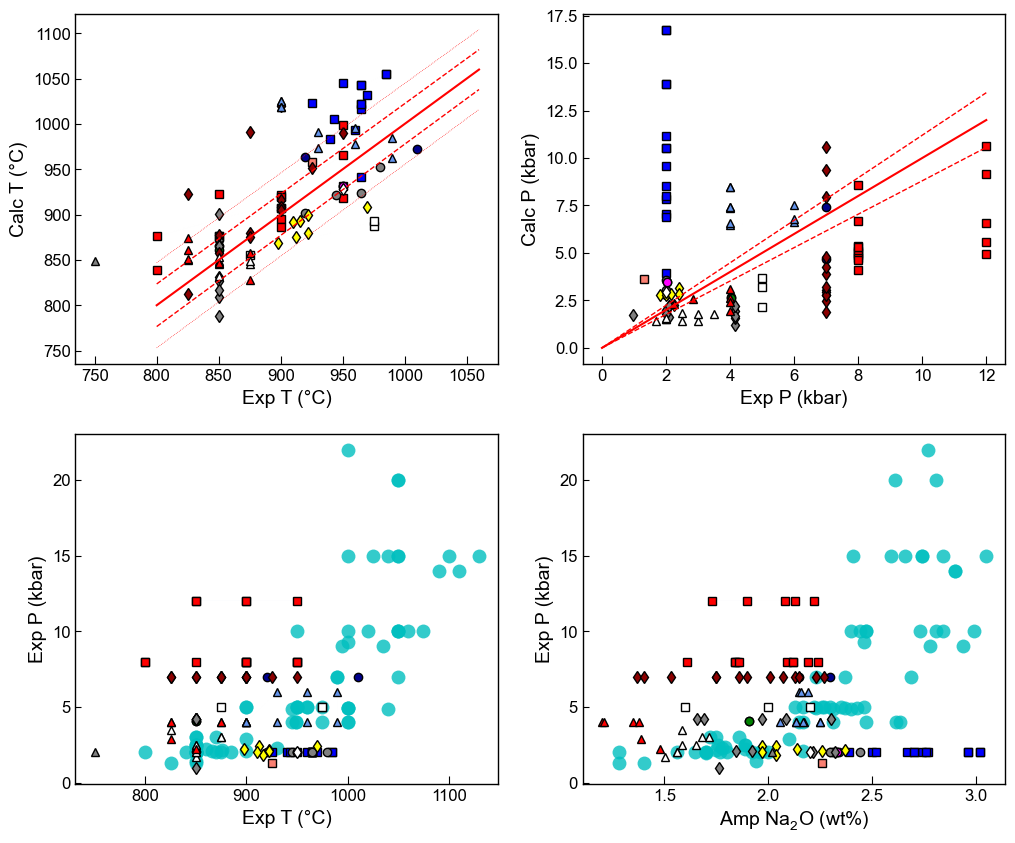

In [19]:

cali_R=pt.return_cali_dataset(model="Ridolfi2021")

fig, ((ax0, ax1), (ax4, ax5)) = plt.subplots(2, 2, figsize=(12,10))
colors = ('red', 'blue', 'salmon', 'white','grey', 
          'magenta', 'darkblue', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'saddlebrown')

ncolor = 0
markers = ('s', 's', 's', 's',
           'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')
nmarkers = 0



for ref in Amp_Glass_filt2['Citation_x'].unique():
    print(ref)
    
    ax0.plot(
             Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15, 
        Press_Ridolfi12_Filt['T_K_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
        
    # ax5.plot(
    #          Amp_Glass_filt2['H2O_Liq'].loc[Amp_Glass_filt2['Citation_x']==ref], 
    #     Calc_Comp['H2O_Ridolfi21'].loc[Amp_Glass_filt2['Citation_x']==ref],
    #   marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )

    # ax6.plot(
    #          Amp_Glass_filt2['DeltaNNO'].loc[Amp_Glass_filt2['Citation_x']==ref], 
    #     Calc_Comp['deltaNNO_Ridolfi21'].loc[Amp_Glass_filt2['Citation_x']==ref],
    #   marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
    
    

    ax1.plot(
             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
        Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref                       )
    #ax1.legend()
    
#     ax2.plot(Press_Ridolfi12_Filt['Na2O_Amp'].loc[Amp_Glass_filt2['Citation_x']==ref],
#              Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-
#              Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
#       marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )

#     ax3.plot(Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref],
#              Press_Ridolfi12_Filt['P_kbar_calc'].loc[Amp_Glass_filt2['Citation_x']==ref]-
#              Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
#       marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )
    
    
    ax5.plot(Press_Ridolfi12_Filt['Na2O_Amp'].loc[Amp_Glass_filt2['Citation_x']==ref],

             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )

    ax4.plot(Amp_Glass_filt2['T_K_x'].loc[Amp_Glass_filt2['Citation_x']==ref]-273.15,

             Amp_Glass_filt2['P_kbar_x'].loc[Amp_Glass_filt2['Citation_x']==ref], 
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,                          )


    ncolor+=1
    nmarkers+=1
    
    
ax4.plot(cali_R['T_K']-273.15,cali_R['P_kbar'],  'oc', mec='None', mfc='c', ms=10, zorder=0, alpha=0.8)



    
ax5.plot(cali_R['Na2O_Amp'],cali_R['P_kbar'],  'oc', mec='None', mfc='c', ms=10, zorder=0, alpha=0.8)

ax1.plot([0, 12], [0, 12], '-r')
ax1.plot([0, 12], [0, 12*1.12], '--r', lw=1)
ax1.plot([0, 12], [0, 12*(1-0.12)], '--r', lw=1)
# ax5.plot([4, 11], [4, 11], '-r')
ax0.plot([800, 1060], [800, 1060], '-r')
ax0.plot([800, 1060], [800+23.5, 1060+22], '--r', lw=1)
ax0.plot([800, 1060], [800-23.5, 1060-22], '--r', lw=1)
ax0.plot([800, 1060], [800+2*23.5, 1060+2*22], ':r', lw=0.5)
ax0.plot([800, 1060], [800-2*23.5, 1060-2*22], ':r', lw=0.5)
ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Calc T (°C)')

# ax5.set_xlabel('H$_2$O Exp (wt%)')
# ax5.set_ylabel('H$_2$O Calc (wt%)')

ax1.set_xlabel('Exp P (kbar)')
ax1.set_ylabel('Calc P (kbar)')

ax5.set_xlabel('Amp Na$_2$O (wt%)')
ax5.set_ylabel('Exp P (kbar)')

ax4.set_xlabel('Exp T (°C)')
ax4.set_ylabel('Exp P (kbar)')


#ax0.legend()

fig.savefig('Ridolfi_test.png', dpi=300, transparent=True, bbox_inches='tight')

In [20]:
len(Amp_Glass_filt2['T_K_x'])

99